## Data Preprocessing
Import Packages and csv

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
df=pd.read_csv("marketing_campaign.csv",sep='\t')


## Data Cleaning 

- Handling Missing Value 
- Handling Duplicates 
- Check Date Type
- Understand the DataSet


## Check Null values


In [2]:
feature_with_null_value =[feature for feature in df.columns if df[feature].isnull().sum()>=1]
for feature in feature_with_null_value:
    print(feature,np.round(df[feature].isnull().mean()*100,5),"% Missing Value")

Income 1.07143 % Missing Value


In [3]:
#statistic on numerical column (null cols)
df[feature_with_null_value].select_dtypes(exclude="object").describe()



Income
count    2216.000000
mean    52247.251354
std     25173.076661
min      1730.000000
25%     35303.000000
50%     51381.500000
75%     68522.000000
max    666666.000000

## Imputing null value
- **impute median value for Income Column** 


In [4]:
#Age
df.Income.fillna(df.Income.median(),inplace=True)



C:\Users\Ayush\AppData\Local\Temp\ipykernel_18412\1867775391.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.Income.fillna(df.Income.median(),inplace=True)


In [5]:
df.duplicated().sum()


np.int64(0)

Remove `Z_CostContact` and `z_Revenue` column from the dataset as it contain no variance 

In [6]:
column_to_drop=['ID','Z_CostContact','Z_Revenue']

for column in column_to_drop:
    df.drop(column,axis=1)
    print(f'The {column} is drop Sucessfully')

The ID is drop Sucessfully
The Z_CostContact is drop Sucessfully
The Z_Revenue is drop Sucessfully


## `Feature Engineering`

In [7]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [8]:
from datetime import datetime   

df['Dt_Customer'] =pd.to_datetime(df['Dt_Customer'],format='%d-%m-%Y')

df = df.copy()

##  creating a new field to store the Age of the customer
df['Age']=2025-df['Year_Birth']   

###  recoding the customer's education level to numeric form (0: high-school, 1: diploma, 2: bachelors, 3: masters, and 4: doctorates)
df["Education"].replace({"Basic":0,"2n Cycle":1, "Graduation":2, "Master":3, "PhD":4},inplace=True)  

#  recoding the customer's marital status to numeric form (0: not living with a partner, 1: living with a partner) 
df['Marital_Status'].replace({"Married":1, "Together":1, "Absurd":0, "Widow":0, "YOLO":0, "Divorced":0, "Single":0,"Alone":0},inplace=True) 

#  creating a new field to store the number of children in the household
df['Children']=df['Kidhome']+df['Teenhome']

#creating Family_Size
df['Family_Size']=df['Marital_Status']+df['Children']+1



#  creating a new field to store the total spending of the customer
df['Total_Spending']=df["MntWines"]+ df["MntFruits"]+ df["MntMeatProducts"]+ df["MntFishProducts"]+ df["MntSweetProducts"]+ df["MntGoldProds"]
df["Total Promo"] =  df["AcceptedCmp1"]+ df["AcceptedCmp2"]+ df["AcceptedCmp3"]+ df["AcceptedCmp4"]+ df["AcceptedCmp5"]

## The following code works out how long the customer has been with the company and store the total number of promotions the customers responded to
df['Dt_Customer']=pd.to_datetime(df['Dt_Customer'])
today=datetime.today()
df['Days_as_Customer']=(today-df['Dt_Customer']).dt.days
df['Offers_Responded_To']=df['AcceptedCmp1']+df['AcceptedCmp2']+df['AcceptedCmp3']+df['AcceptedCmp4']+df['AcceptedCmp5']+df['Response']
df["Parental Status"] = np.where(df["Children"] > 0, 1, 0)






#dropping columns which are already used to create new features
columns_to_drop = ['Year_Birth','Kidhome','Teenhome']
df.drop(columns = columns_to_drop, axis = 1, inplace=True)
df.rename(columns={"Marital_Status": "Marital Status","MntWines": "Wines","MntFruits":"Fruits",
                   "MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets",
                   "MntGoldProds":"Gold","NumWebPurchases": "Web","NumCatalogPurchases":"Catalog",
                   "NumStorePurchases":"Store","NumDealsPurchases":"Discount Purchases"},
          inplace = True)

df = df[["Age","Education","Marital Status","Parental Status","Children","Income","Total_Spending","Days_as_Customer","Recency","Wines","Fruits","Meat","Fish","Sweets","Gold","Web","Catalog","Store","Discount Purchases","Total Promo","NumWebVisitsMonth"]]

C:\Users\Ayush\AppData\Local\Temp\ipykernel_18412\1722130445.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Education"].replace({"Basic":0,"2n Cycle":1, "Graduation":2, "Master":3, "PhD":4},inplace=True)
C:\Users\Ayush\AppData\Local\Temp\ipykernel_18412\1722130445.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_si

In [9]:
df.shape

(2240, 21)

In [10]:
numeric_feature=[feature for feature in df.columns if df[feature].dtype!='o']
print("Number of Numerical feature ",len(numeric_feature))


discreate_feature=[feature for feature in numeric_feature if(len(df[feature].unique()))<=25]
print("Number of Numerical feature ",len(discreate_feature))

Number of Numerical feature  21
Number of Numerical feature  10


In [11]:
continuous_feature=[feature for feature in df.columns if feature not in discreate_feature]
print("Number of Numerical feature ",len(continuous_feature))

Number of Numerical feature  11


In [12]:
categorical_feature=[feature for i in df.columns if df[feature].dtype =='Object']
print("Number of Numerical feature ",len(categorical_feature))

Number of Numerical feature  0


## Checking For Outliers


In [13]:
continuous_feature

['Age',
 'Income',
 'Total_Spending',
 'Days_as_Customer',
 'Recency',
 'Wines',
 'Fruits',
 'Meat',
 'Fish',
 'Sweets',
 'Gold']

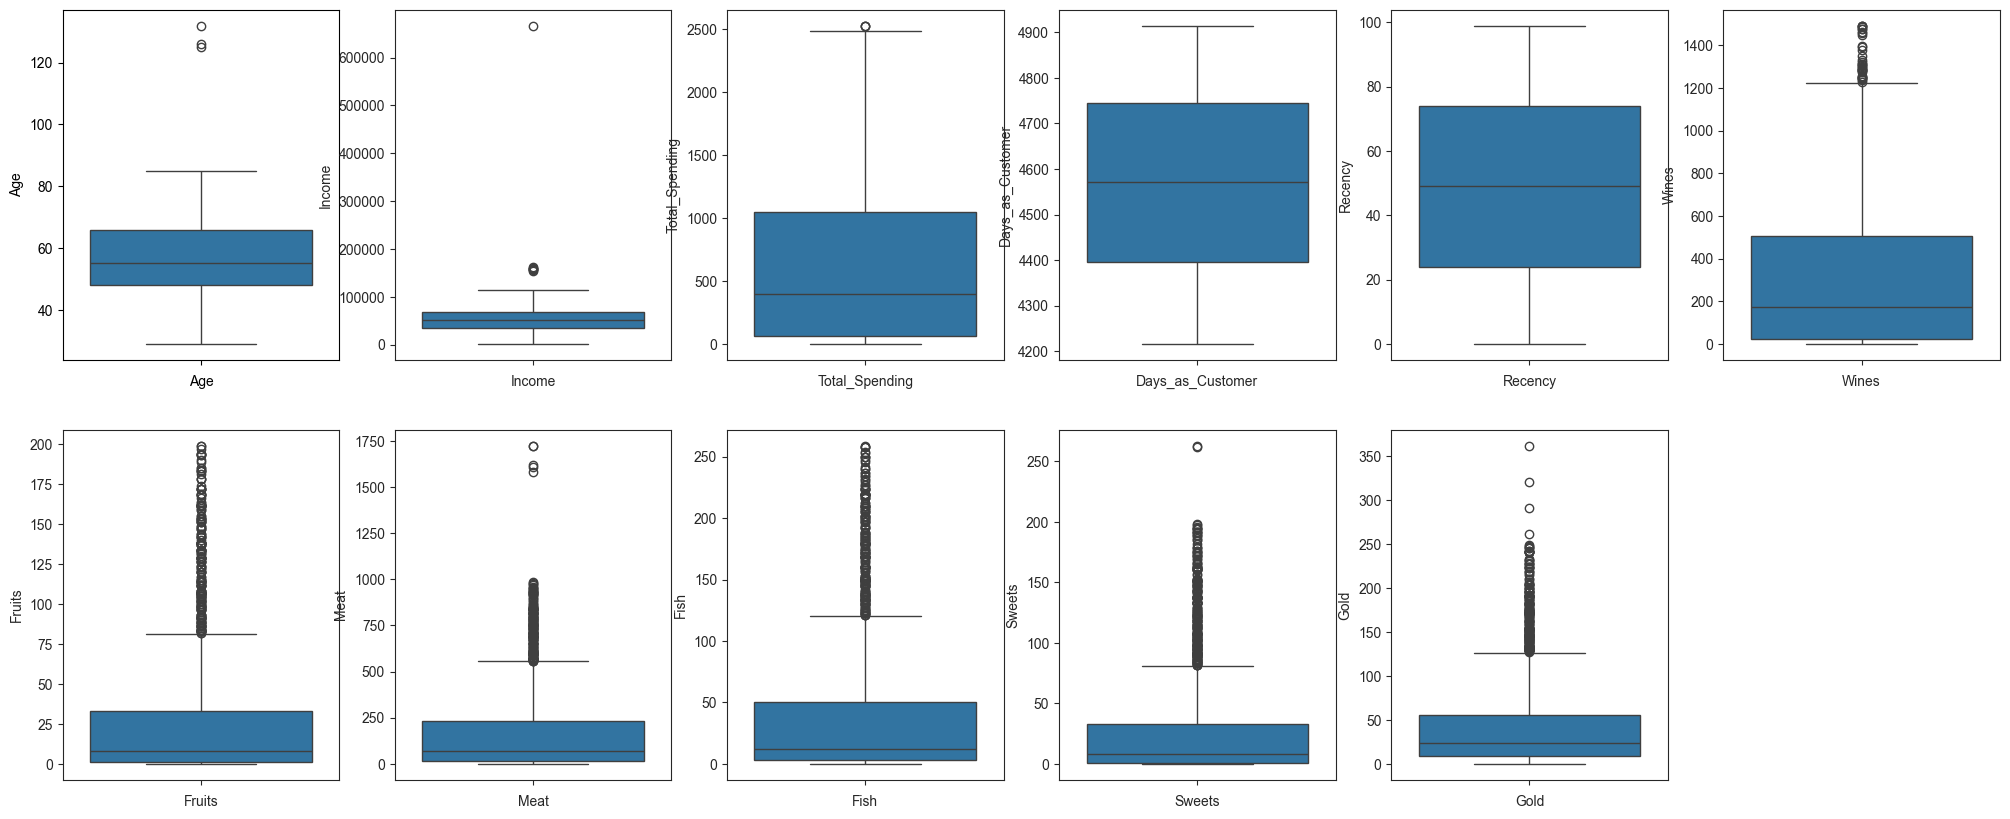

In [14]:
count_feature=continuous_feature.copy()

plt.figure(figsize=(25,10))

for i in range(len(count_feature)):
    plt.subplot(2,6,i+1)
    sns.set_style('ticks')
    plt.xlabel(count_feature[i])
    ax=sns.boxplot(df[count_feature[i]])

**report**

- We can see, there are no such outliers in Recency and Days_as_Customer Column 
  But there are outliers in following columns 
- Income
- Wines
- Fruits
- Meat
- Fish
-Sweets
- Gold
- Age
- Total Spending

**Detecting outlier and capping it**

In [15]:
def detect_outlier(col):
    percentile25=df[col].quantile(0.25)
    percentile75=df[col].quantile(0.75)
    print("\n###",col,"###")
    print("percentile25",percentile25)
    print("percentile75",percentile75)
    iqr=percentile25=percentile75
    upper_limit=percentile75+1.5*iqr
    lower_limit=percentile25-1.5*iqr
    print("upper_limit",upper_limit)
    print("lower_limit",lower_limit)

    df.loc[df[col]>upper_limit,col]=upper_limit
    df.loc[df[col]<lower_limit,col]=lower_limit
    return df




In [16]:
for col in continuous_feature:
    detect_outlier(col)


### Age ###
percentile25 48.0
percentile75 66.0
upper_limit 165.0
lower_limit -33.0

### Income ###
percentile25 35538.75
percentile75 68289.75
upper_limit 170724.375
lower_limit -34144.875

### Total_Spending ###
percentile25 68.75
percentile75 1045.5
upper_limit 2613.75
lower_limit -522.75

### Days_as_Customer ###
percentile25 4396.75
percentile75 4745.0
upper_limit 11862.5
lower_limit -2372.5

### Recency ###
percentile25 24.0
percentile75 74.0
upper_limit 185.0
lower_limit -37.0

### Wines ###
percentile25 23.75
percentile75 504.25
upper_limit 1260.625
lower_limit -252.125

### Fruits ###
percentile25 1.0
percentile75 33.0
upper_limit 82.5
lower_limit -16.5

### Meat ###
percentile25 16.0
percentile75 232.0
upper_limit 580.0
lower_limit -116.0

### Fish ###
percentile25 3.0
percentile75 50.0
upper_limit 125.0
lower_limit -25.0

### Sweets ###
percentile25 1.0
percentile75 33.0
upper_limit 82.5
lower_limit -16.5

### Gold ###
percentile25 9.0
percentile75 56.0
upper_limit 140.0
lo

C:\Users\Ayush\AppData\Local\Temp\ipykernel_18412\1258148646.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2613.75' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[col]>upper_limit,col]=upper_limit
C:\Users\Ayush\AppData\Local\Temp\ipykernel_18412\1258148646.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '11862.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[col]>upper_limit,col]=upper_limit
C:\Users\Ayush\AppData\Local\Temp\ipykernel_18412\1258148646.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1260.625' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[col]>upper_limit

In [17]:
df[continuous_feature].skew(axis=0,skipna=True)

Age                 0.349944
Income              0.410493
Total_Spending      0.860841
Days_as_Customer   -0.015216
Recency            -0.001987
Wines               1.114380
Fruits              1.251718
Meat                1.256380
Fish                1.267377
Sweets              1.231460
Gold                1.231309
dtype: float64

## Feature Scaling 

In [18]:
df.shape

(2240, 21)

In [19]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
outlier_features = ["Wines","Fruits","Meat","Fish","Sweets","Gold","Age","Total_Spending"] #we can find the columns which has oitliers in the EDA
numeric_features = [x for x in numeric_features if x not in outlier_features]

In [ ]:
from sklearn.preprocessing import StandardScaler,PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline


datac=df.copy()

numeric_pipeline=Pipeline(steps=
                          [("Imputer",SimpleImputer(strategy='constant',fill_value=0)),
                           ("standardscaler",StandardScaler())]
                          )

outlier_pipeline=Pipeline(steps=
                          
                          [
                            ("imputer",SimpleImputer(strategy='constant',fill_value=0)),
                            ('powerTransformer',PowerTransformer(standardize=True))
                          ]
                          
                          )
preprocessor=ColumnTransformer(
    
                                [("numeric pipeline",numeric_pipeline,numeric_features),
                                ("outlier feature pipeline",outlier_pipeline,outlier_features)
                                
                                ]
                                )
columns=datac.columns
datac=preprocessor.fit_transform(datac)
scaled_data=pd.DataFrame(datac,columns=columns)
scaled_data.head()

  


Age  Education  Marital Status  Parental Status  Children    Income  \
0 -0.458383  -1.346874       -1.584605        -1.264505  0.284088  1.531185   
1 -0.458383  -1.346874        0.631072         1.396361 -0.263257 -1.190545   
2 -0.458383   0.742460       -1.584605        -1.264505  0.909446 -0.205773   
3 -0.458383   0.742460        0.631072         0.065928 -1.177417 -1.061881   
4  1.533425   0.742460        0.631072         0.065928  0.291281 -0.953012   

   Total_Spending  Days_as_Customer   Recency     Wines  ...      Meat  \
0        0.307039          1.409304  2.510890 -0.550785  ... -0.439037   
1       -0.383664         -1.110409 -0.568720 -1.166125  ... -0.439037   
2       -0.798086          1.409304 -0.226541  1.295237  ... -0.439037   
3       -0.798086         -0.750450 -0.910898 -0.550785  ... -0.439037   
4        1.550305          0.329427  0.115638  0.064556  ... -0.439037   

       Fish    Sweets      Gold       Web   Catalog     Store  \
0  0.693904  1.061547  1.494233  1.492952  1.507822  1.480316   
1 -0.130463 -1.211297 -1.000471 -1.376391 -0.887480 -0.986943   
2 -0.542647  0.748227  1.141943  0.454659  1.424604  0.578232   
3  0.281720 -1.211297 -0.402506 -0.720426 -0.109912 -0.541834   
4 -0.130463  0.123830  1.054604  0.404824  0.827406  0.739642   

   Discount Purchases  Total Promo  NumWebVisitsMonth  
0            1.163649     0.990496           1.315325  
1           -0.959236     1.211896          -1.441421  
2            0.464670     0.371503           0.661160  
3           -1.061954    -1.317387          -1.117205  
4           -0.362399    -1.024964           0.179327  

[5 rows x 21 columns]

## `Model Building`

**Silhoutte score**
 - Silhoutte score is the measure how similar is to its own cluster (cohesion) compared to other cluster(separation) this silhoutte ranges form -1 to +1 where a high value indicate that the object is well matched to its own cluster and poorly matched to neighboring cluster 
 

In [ ]:
from sklearn.metrics import silhouette_score,silhouette_samples
from matplotlib import cm

def silhouette_plot(model,range_n_clusters,X_clustering,pca,**kwargs):
    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X_clustering) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = model(n_clusters,**kwargs)
        cluster_labels = clusterer.fit_predict(X_clustering)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X_clustering, cluster_labels)
        print(
            "For n_clusters =",
            n_clusters,
            "The average silhouette_score is :",
            silhouette_avg,
        )

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X_clustering, cluster_labels)

        y_lower = 10
        ## NESTED FOR LOOP 
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(
                np.arange(y_lower, y_upper), 
                0,
                ith_cluster_silhouette_values,
                facecolor=color,
                edgecolor=color,
                alpha=0.7,
            )

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.2,-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
    #     colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)

        sns.scatterplot(
            x = pca[:, 0],
            y = pca[:, 1],
            hue=cluster_labels,
            palette=sns.color_palette("colorblind", len(set(cluster_labels))),
            alpha=0.7,
            legend="full",
            ax = ax2
        )
        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(
            f"Silhouette analysis for {model.__name__} clustering on sample data with n_clusters = %d"
            % n_clusters,
            fontsize=14,
            fontweight="bold",
        )

    plt.show()

## **PCA (Principal Component Analysis)**
- There is many high correlation feature so we will use some dimentinality reduction. We can use PCA

- Principal Component Analysis, or PCA, is a dimensionality-reduction method that is often used to reduce the dimensionality of large data sets, by transforming a large set of variables into a smaller one that still contains most of the information in the large set.

- Reducing the number of variables of a data set naturally comes at the expense of accuracy, but the trick in dimensionality reduction is to trade a little accuracy for simplicity. Because smaller data sets are easier to explore and visualize and make analyzing data much easier and faster for machine learning algorithms without extraneous variables to process.

In [33]:
from sklearn.decomposition import PCA

df_scaled=scaled_data.copy()
var_ratio={}

for n in range(2,18):
    pc=PCA(n_components=n)
    df_pca=pc.fit(df_scaled)
    var_ratio[n]=sum(df_pca.explained_variance_ratio_)


print(var_ratio)

{2: np.float64(0.5011120911110323), 3: np.float64(0.5795126625854523), 4: np.float64(0.6317186484982662), 5: np.float64(0.6800983060406703), 6: np.float64(0.7271943790784677), 7: np.float64(0.7696376777643), 8: np.float64(0.80804112250121), 9: np.float64(0.8380690974374988), 10: np.float64(0.8643409795510704), 11: np.float64(0.8860091100070105), 12: np.float64(0.9074636824560165), 13: np.float64(0.9266628066157088), 14: np.float64(0.9414119707820331), 15: np.float64(0.9555182648922596), 16: np.float64(0.9690712279229134), 17: np.float64(0.980292150343136)}


In [54]:
# apply PCA and display clustering metrics
from sklearn.cluster import KMeans
for y in range(2, 8):
    print("PCA with # of components: ", y)
    pca = PCA(n_components=y)
    data_p = pca.fit_transform(df_scaled)
    for x in range(2, 7):
        kmean = KMeans(n_clusters = x,)
        label = kmean.fit_predict(data_p)
        print('Silhouette-Score for', x,  'Clusters: ', silhouette_score(data_p, label) , '-  Inertia: ',kmean.inertia_)
    print()

PCA with # of components:  2
Silhouette-Score for 2 Clusters:  0.5274920996955048 -  Inertia:  9051.556053368044
Silhouette-Score for 3 Clusters:  0.5095339584296585 -  Inertia:  5129.512040115746
Silhouette-Score for 4 Clusters:  0.4551068546619433 -  Inertia:  3987.7725914402226
Silhouette-Score for 5 Clusters:  0.43379484787297706 -  Inertia:  3299.915595933179
Silhouette-Score for 6 Clusters:  0.4129365758073616 -  Inertia:  2869.974593154948

PCA with # of components:  3
Silhouette-Score for 2 Clusters:  0.4534462082940552 -  Inertia:  12739.038818367173
Silhouette-Score for 3 Clusters:  0.4056281932317232 -  Inertia:  8797.551339967004
Silhouette-Score for 4 Clusters:  0.3353053964009166 -  Inertia:  7604.319401863122
Silhouette-Score for 5 Clusters:  0.29387852412109416 -  Inertia:  7175.178336665248
Silhouette-Score for 6 Clusters:  0.31725220277819943 -  Inertia:  5726.88030692069

PCA with # of components:  4
Silhouette-Score for 2 Clusters:  0.41640543810338754 -  Inertia:  

**Report**

- We can go with PCA with 2 components.
- We can go with Kmeans Clusters in the range of 4-6 as it has Good score with lesser Inertia compared to others

In [83]:
pca_final=PCA(n_components=2,random_state=42).fit(df_scaled)

reduced=pca_final.fit_transform(df_scaled)

pcadf=pd.DataFrame(reduced)

pcadf.columns=['pc1','pc2']
pcadf.head(10)

pc1       pc2
0  4.128155  0.502342
1 -3.502843 -0.535142
2  3.014700 -0.845885
3 -2.777794 -1.109761
4  0.782242  0.796459
5  1.096187  0.971315
6  1.534105  1.360773
7 -1.831554  0.485213
8 -3.447225 -0.156715
9 -5.214703  1.468259

In [34]:
pca_final.explained_variance_ratio_

array([0.39278828, 0.10832381])

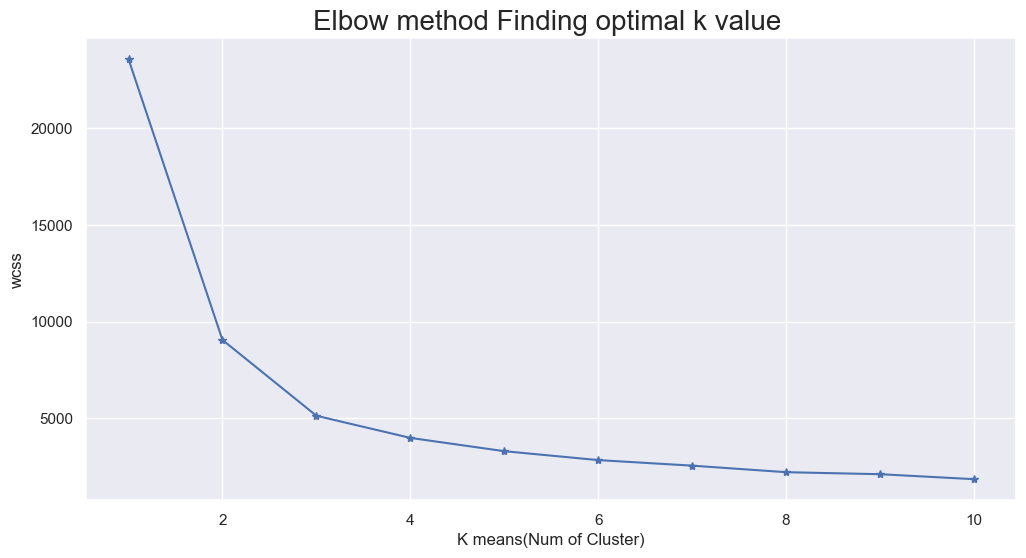

[23572.312765862942,
 9051.452560627644,
 5129.520363584174,
 3984.3179355889456,
 3297.546222132958,
 2836.82248416945,
 2549.293065817435,
 2210.808216097495,
 2107.1839379659714,
 1850.1205513506886]

In [55]:
wcss=[]
sns.set()
plt.figure(figsize=(12,6))
for i in range(1,11):
    kmean=KMeans(n_clusters=i)
    kmean.fit(pcadf)
    wcss.append(kmean.inertia_) 

plt.plot(range(1,11),wcss,marker='*')
plt.title("Elbow method Finding optimal k value ",fontsize=20)
plt.xlabel('K means(Num of Cluster)')
plt.ylabel('wcss')
plt.show()
wcss




- here the optitmum number of cluster is 3 since iis it the place where the graph is start to flatten out meaning that having higher number of cluster will not yield a much more fitting machine 


**Reports:**

 - We will use k = 3, thus there will be three clusters in our dataset.
 - We will use KMeans Algorithm for clustering

## Silhoutte Score Plot for K-Means to choose best number of clusters

For n_clusters = 3 The average silhouette_score is : 0.5095339584296585
For n_clusters = 4 The average silhouette_score is : 0.45261810599348135
For n_clusters = 5 The average silhouette_score is : 0.43920126075266835
For n_clusters = 6 The average silhouette_score is : 0.38957098898089504


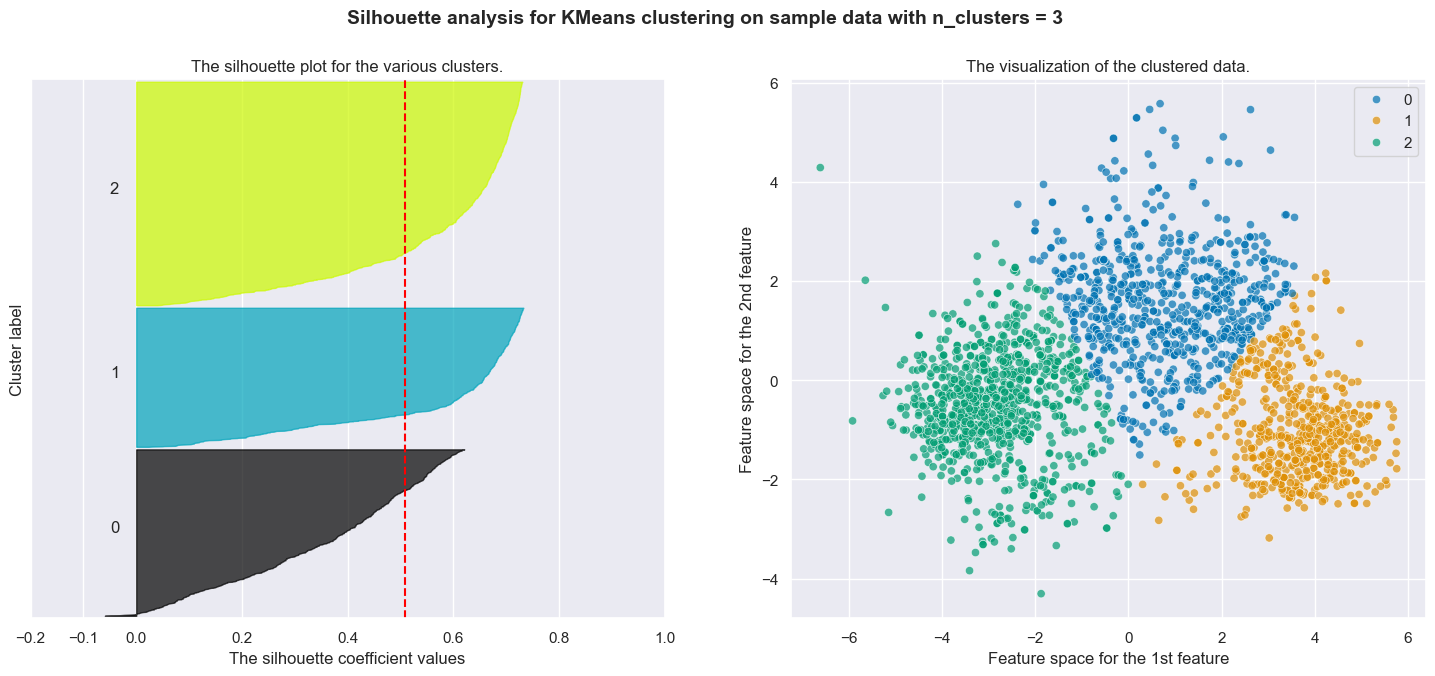

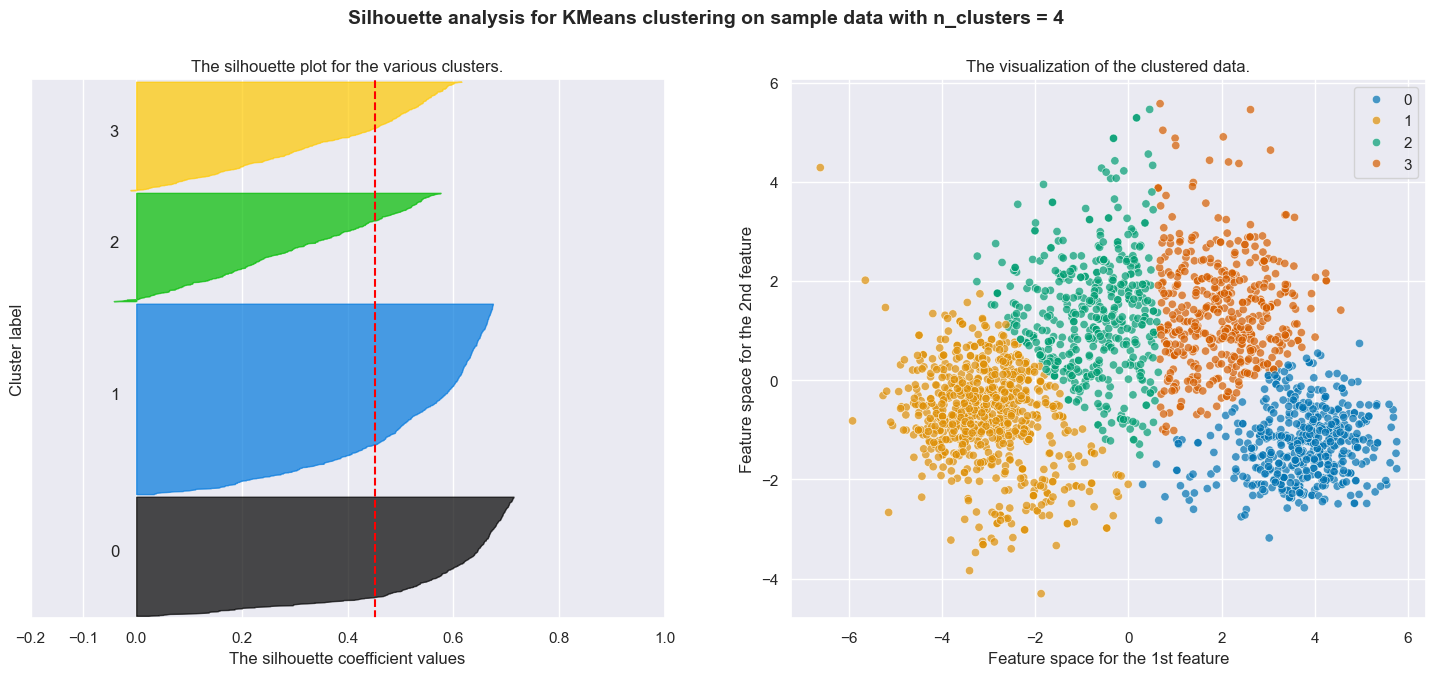

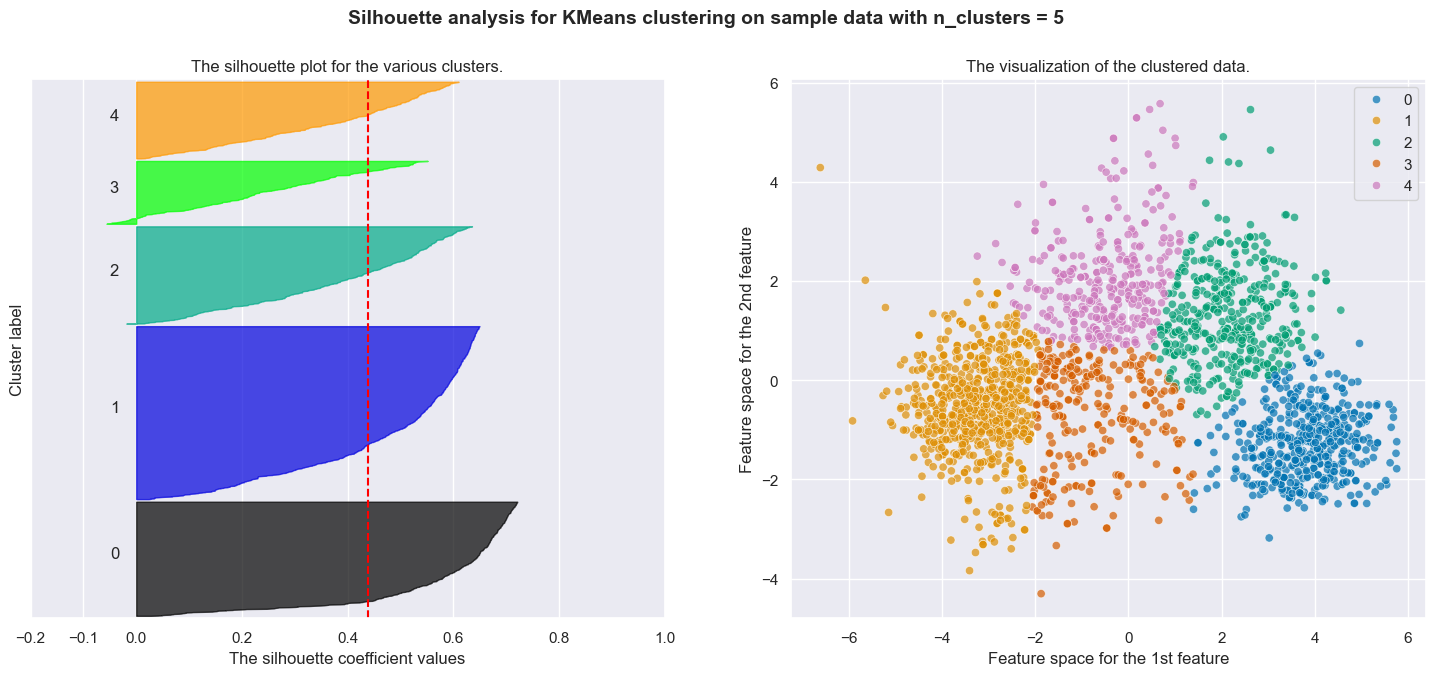

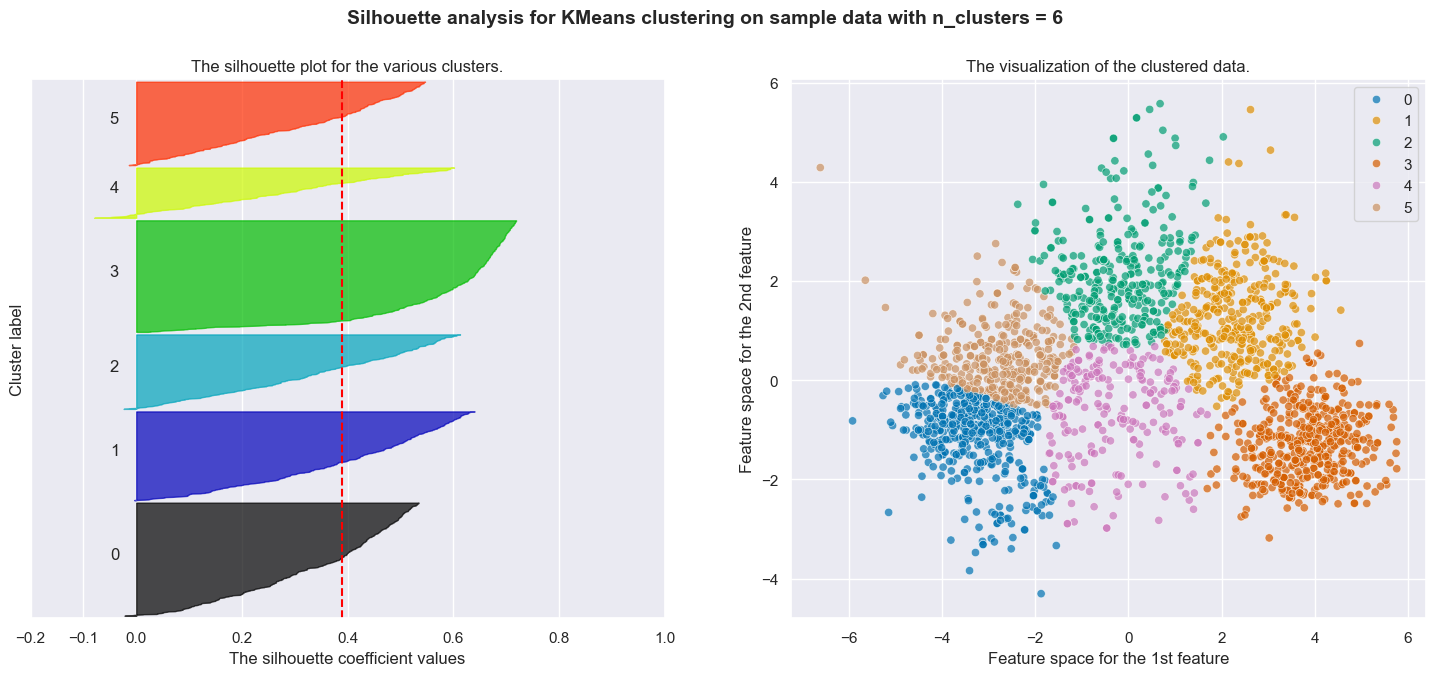

In [56]:
silhouette_plot(KMeans,range(3,7),pcadf,reduced)

**Report**
- For n_clusters = 3 The average silhouette_score is : 0.5104
- For n_clusters = 4 The average silhouette_score is : 0.4565
- For n_clusters = 5 The average silhouette_score is : 0.42996
- For n_clusters = 6 The average silhouette_score is : 0.390

**Conclusions**
 - Cluster of 3 has good balance of inertia and shilloute score,we can go with 3 cluster

#### Apply Kmeans Clustering with 3 cluster 


In [ ]:
## fitting the modle to reduced data
model =KMeans(n_clusters=3).fit(pcadf)
model_label=model.labels_
model_centers=model.cluster_centers_



[0 1 0 ... 0 0 1]


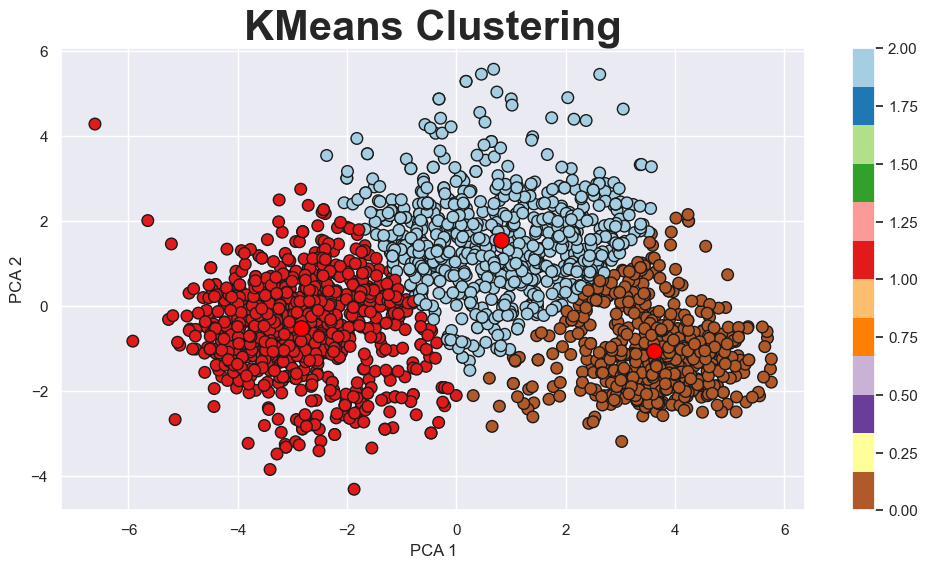

In [68]:
# Plotting the clusters
plt.figure(figsize=(12,6))
plt.title('KMeans Clustering', weight='bold', size=30)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

scatter = plt.scatter(
    x=pcadf.iloc[:, 0],
    y=pcadf.iloc[:, 1],
    c=model_label,
    s=70,
    cmap="Paired_r",
    edgecolors='k'
)

plt.colorbar(scatter)

# Plot cluster centers
plt.scatter(
    model_centers[:, 0],
    model_centers[:, 1],
    c='red',
    marker='.',
    s=500,
    edgecolors='k'
)

plt.show()


**Hierarchical clustering (Agglomerative)**

- Agglomerative Clustering: Also known as bottom-up approach or hierarchical agglomerative clustering (HAC).
A structure that is more informative than the unstructured set of clusters returned by flat clustering. This clustering algorithm does not require us to prespecify the number of clusters.
- Bottom-up algorithms treat each data as a singleton cluster at the outset and then successively agglomerates pairs of clusters until all clusters have been merged into a   single cluster that contains all data.
- Silhoutte Score Plot for Agglomerative Clustering to choose best number of clusters
We will go with the n_clusters range of 3-7 to find the best cluster for Agglomerative clustering

For n_clusters = 3 The average silhouette_score is : 0.46507618332064526
For n_clusters = 4 The average silhouette_score is : 0.4242791343988486
For n_clusters = 5 The average silhouette_score is : 0.39661373560122115
For n_clusters = 6 The average silhouette_score is : 0.3393013080451783
For n_clusters = 7 The average silhouette_score is : 0.32881325870231226


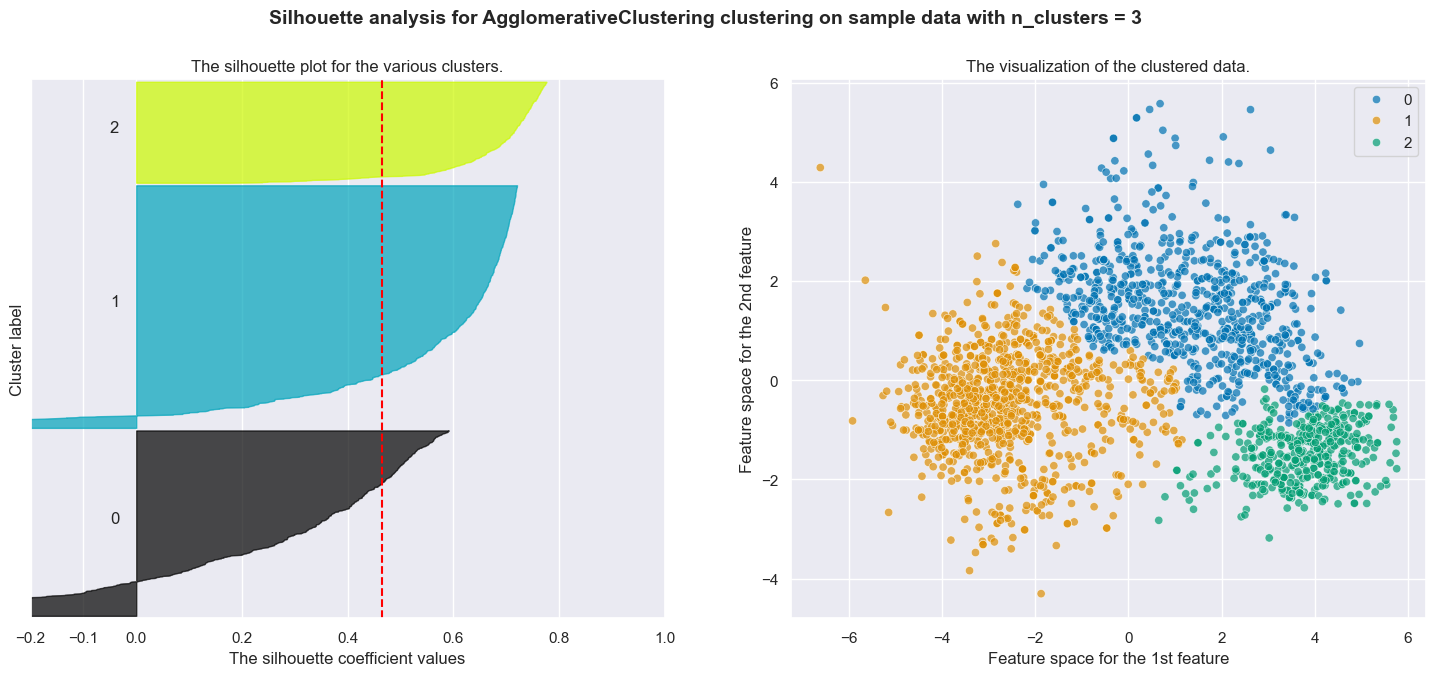

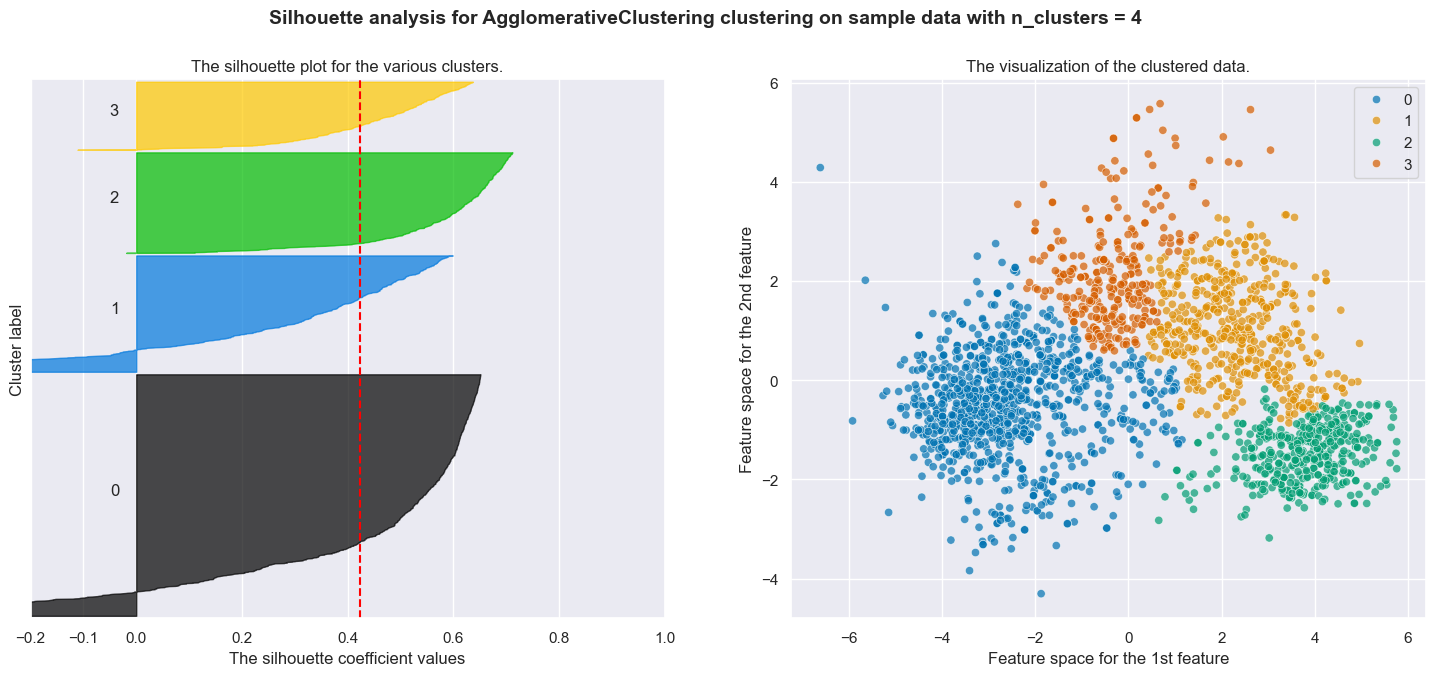

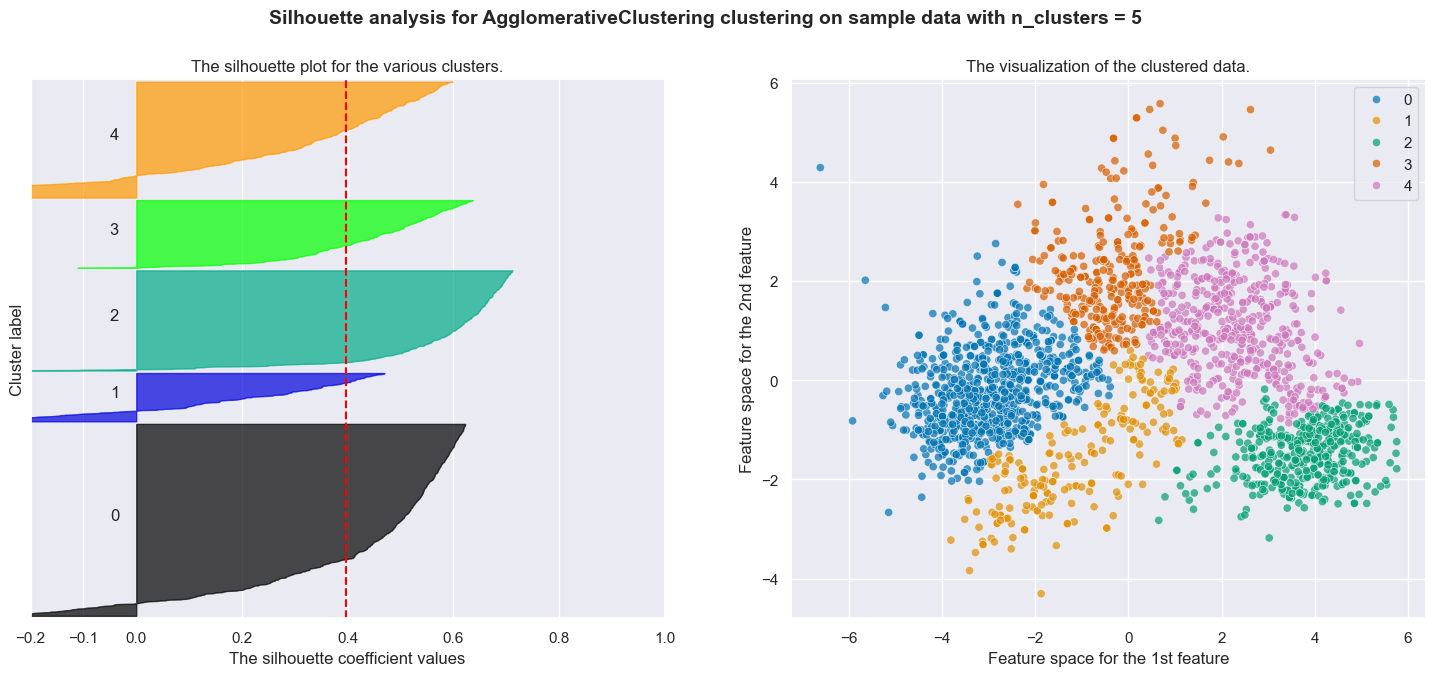

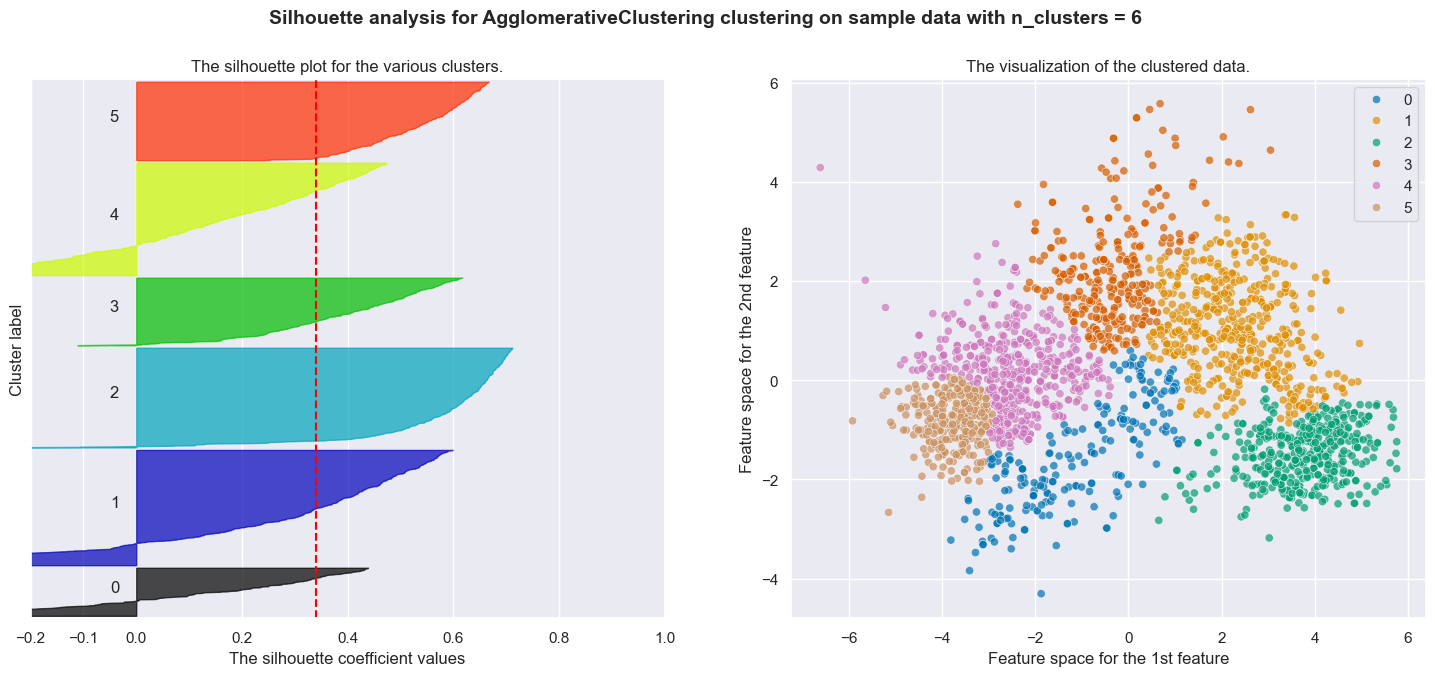

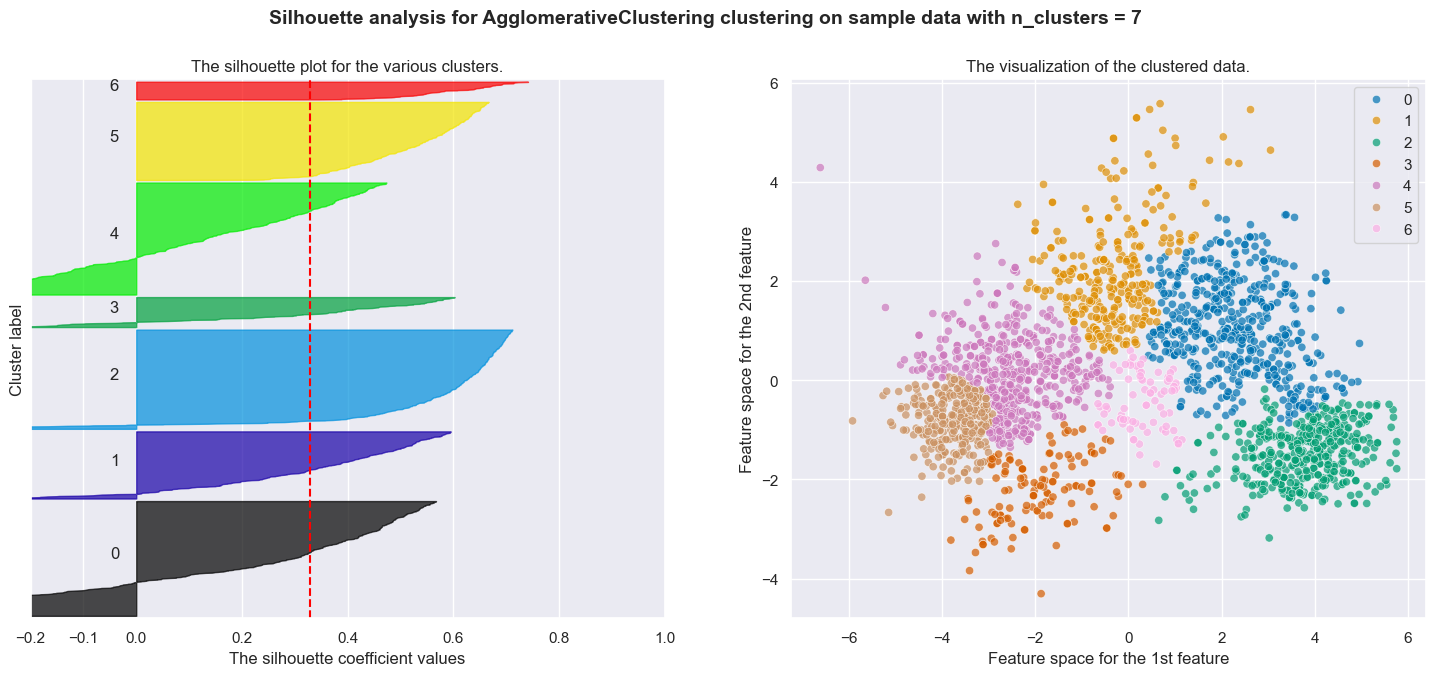

In [70]:
from sklearn.cluster import AgglomerativeClustering

silhouette_plot(AgglomerativeClustering,range(3,8),pcadf,reduced)

**Visualization of Agglomerative Clustering**
best average silhouette_score is : 0.479

- For n_clusters = 3 The average silhouette_score is : 0.46507618332064526
- For n_clusters = 4 The average silhouette_score is : 0.4242791343988486
- For n_clusters = 5 The average silhouette_score is : 0.39661373560122115
- For n_clusters = 6 The average silhouette_score is : 0.3393013080451783
- For n_clusters = 7 The average silhouette_score is : 0.32881325870231226

**`Conclusions`**

Clusters of 3 has good balance of Inertia and Shilloute score, we can go with with 3 clusters.

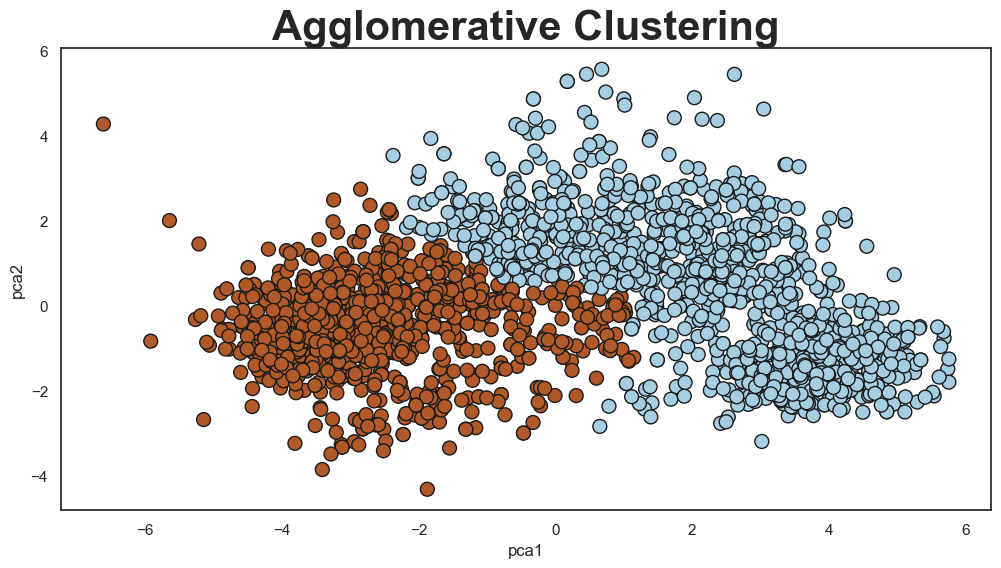

In [85]:
model = AgglomerativeClustering(n_clusters=2,metric='euclidean', linkage='ward').fit(reduced)
model_label = model.labels_
plt.figure(figsize=(12,6))

sns.set_style('white')
plt.title('Agglomerative Clustering', weight='bold', size=30)
plt.xlabel('pca1')
plt.ylabel('pca2')
scatter = plt.scatter(pcadf['pc1'], pcadf['pc2'], c=model_label, s=100, cmap='Paired', ec='k')

**Report**

- Agglomerative clustering performed well than K means clustering.
- The best Silhoutte score is 0.46, were as K means had 0.44 Silhoutte score.


### **Gaussian Mixture**

For n_clusters = 3 The average silhouette_score is : 0.47704291454999365
For n_clusters = 4 The average silhouette_score is : 0.44266467084080663
For n_clusters = 5 The average silhouette_score is : 0.4455334011035825
For n_clusters = 6 The average silhouette_score is : 0.40954168649493355
For n_clusters = 7 The average silhouette_score is : 0.39632414135962213


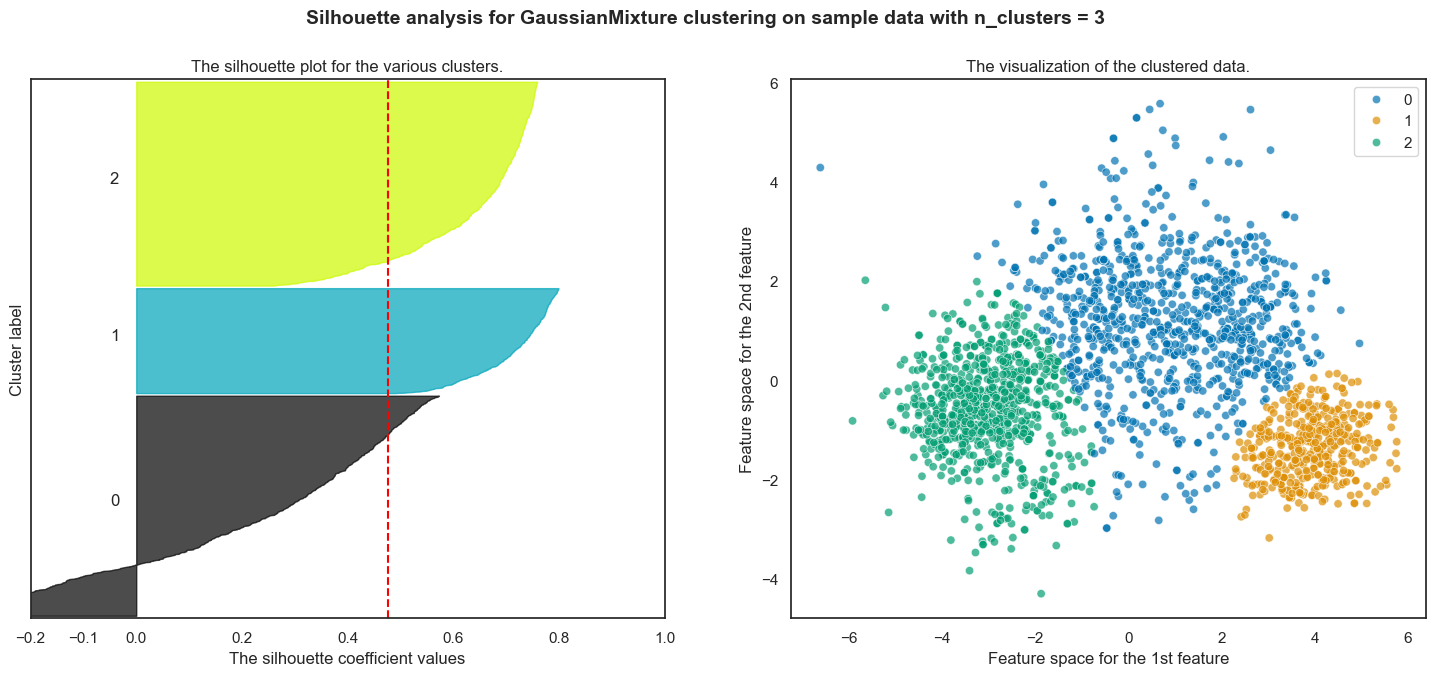

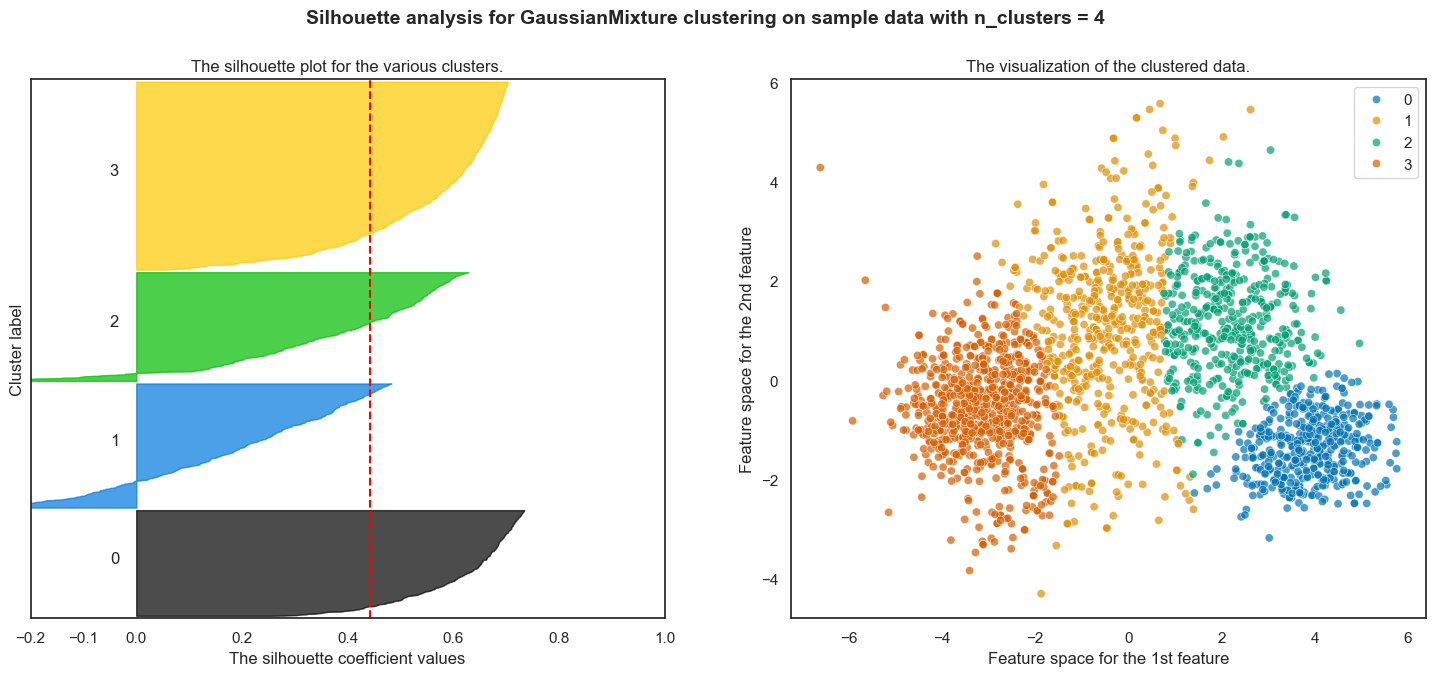

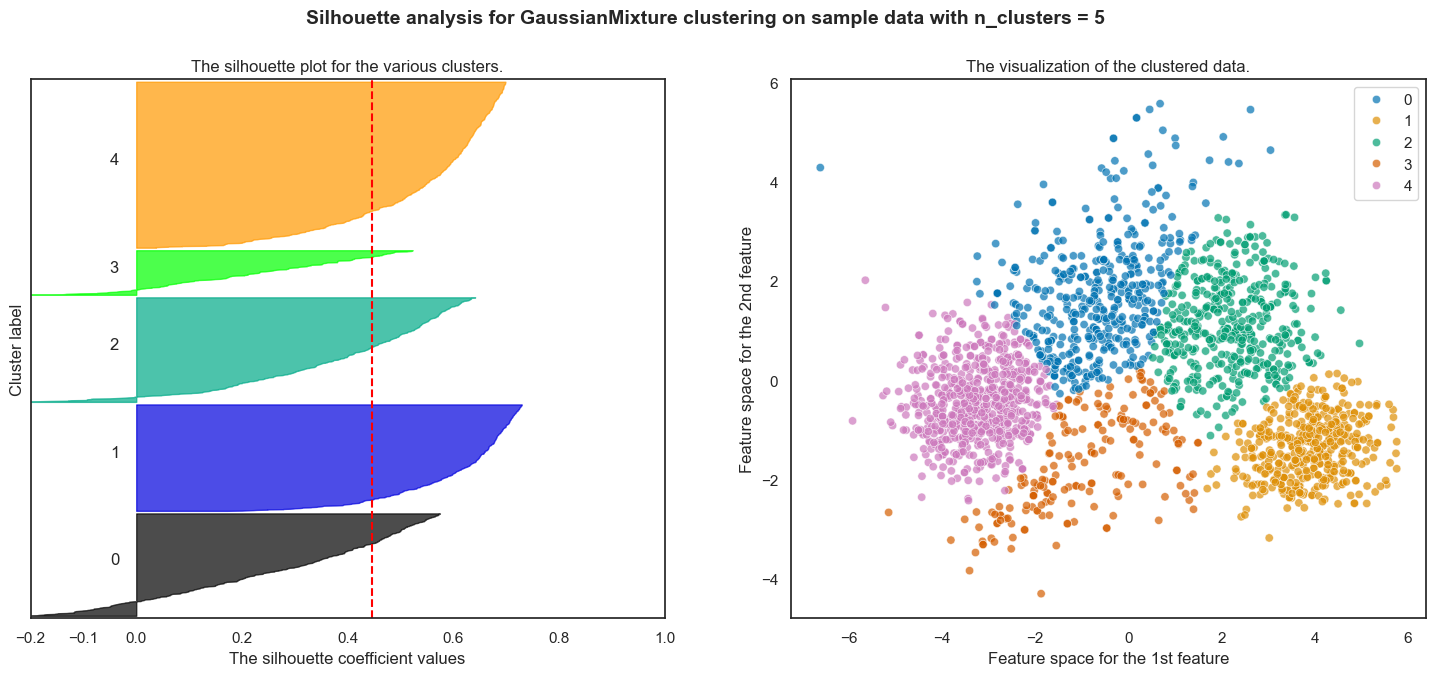

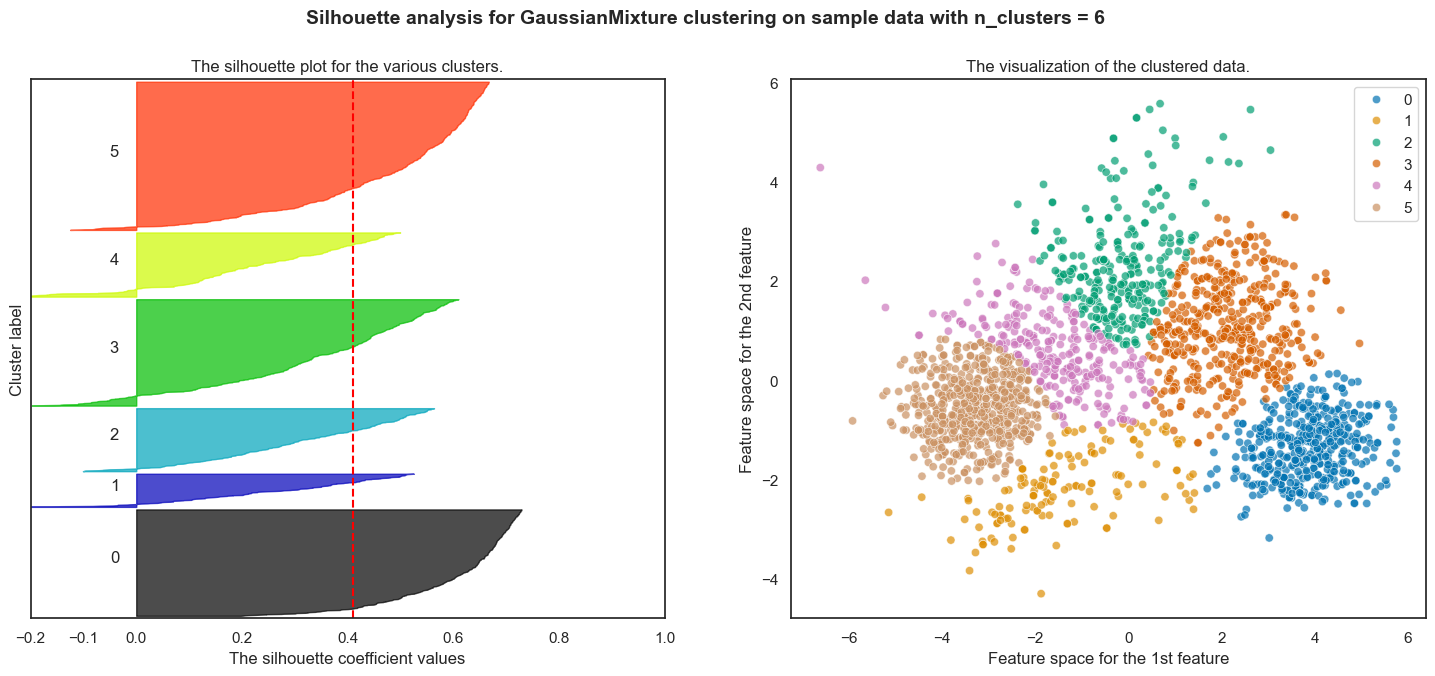

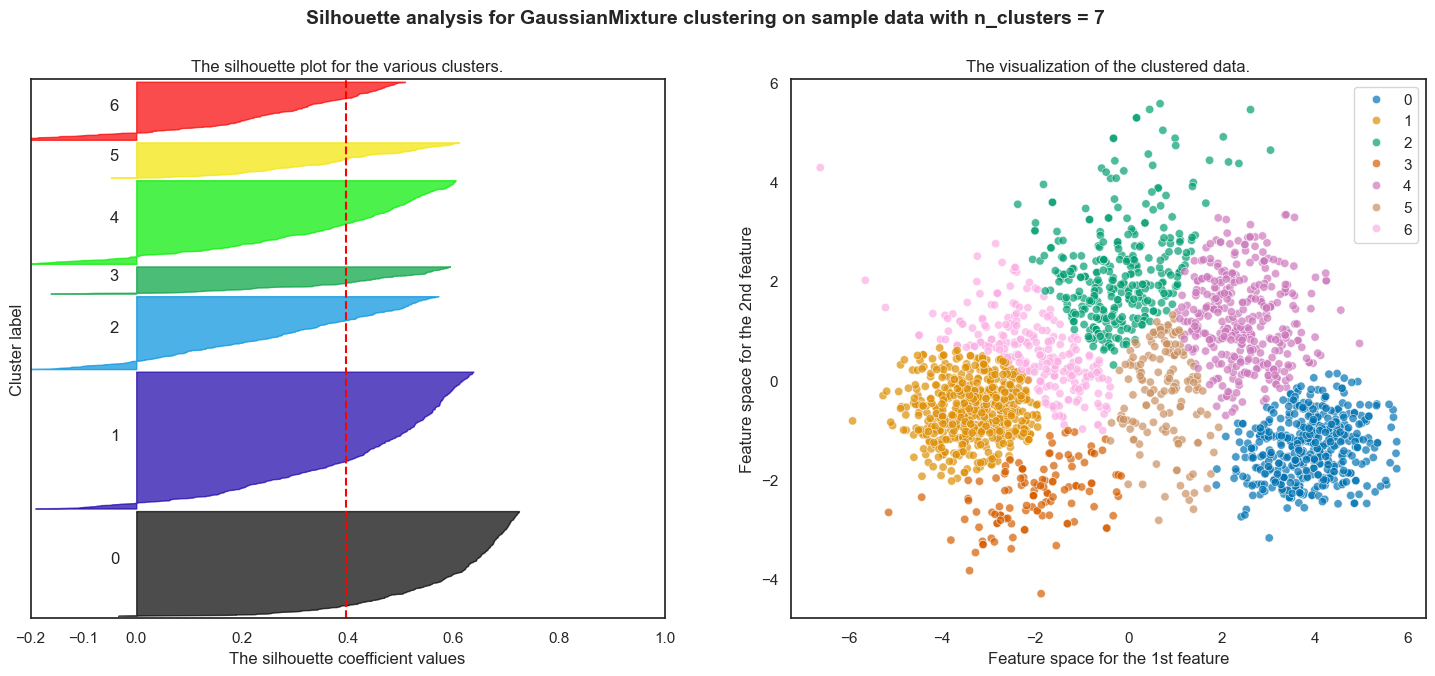

In [ ]:
from sklearn.mixture import GaussianMixture

silhouette_plot(GaussianMixture,range(3,8),pcadf,reduced)

**Report**
- For n_cluster =3 The average silhoutte_score is:0.47


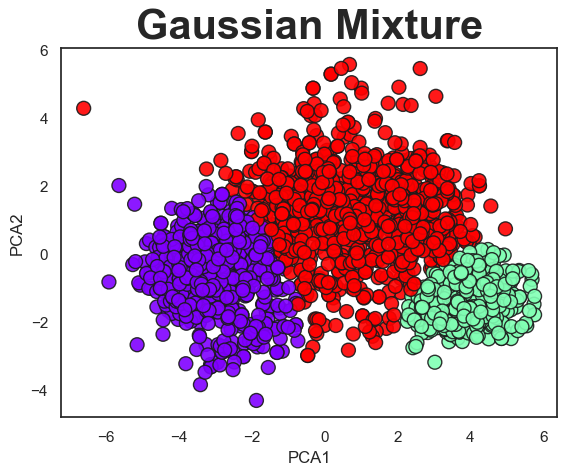

In [89]:
model=GaussianMixture(n_components=3,random_state=42).fit(reduced)
model_label=model.predict(reduced)
sns.set_style('white')
plt.title('Gaussian Mixture', weight='bold', size=30)
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.scatter(x=pcadf.iloc[:,0],
            y=pcadf.iloc[:,1],
            c=model_label,
            s=100,
            cmap='rainbow',
            edgecolors='k',
            alpha=0.9)

### `DBSCAN Clustering`
- Density-based spatial clustering of applications with noise (DBSCAN) is a data clustering algorithm.
 -DBSCAN algorithm group points based on distance measurement, usually the Euclidean distance and the minimum number of points. An essential property of this algorithm is that it helps us track down the outliers as the points in low-density regions; hence it is not sensitive to outliers as is the case of K-Means clustering.
Minimum Points minPts

- In DBSCAN minPts is the minimum number of data points that should be there in the region to define the cluster. You can choose the value of minPts based on your domain knowledge. But if you lack domain knowledge a good reference point is to have minPts ≥ D + 1 where D is the dimension of the dataset.

- It is recommended to keep the value for the minPts at least 3, but for larger data sets, a greater minPts value should be chosen, especially if it has many outliers.

 ### **Finding the Optimal value of Epsilon**
 Rather than experimenting with different values of epsilon, we can use the elbow point detection method to arrive at a suitable value of epsilon.

- In this approach, the average distance between each point and its k nearest neighbors is calculated where k = the MinPts selected.

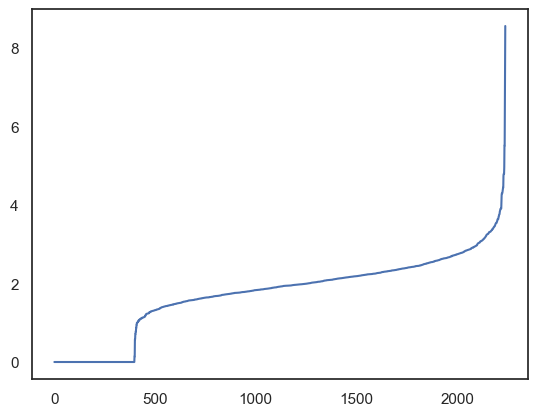

In [ ]:
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
neighbour =NearestNeighbors(n_neighbors=17)
neighbour_fit=neighbour.fit(df_scaled)
distance,indices=neighbour_fit.kneighbors(df_scaled)   # its make a two dimensional array 


distance=np.sort(distance,axis=0)

distance=distance[:,1]

plt.plot(distance)
plt.show()  


### Kneedle Algorithim

<Figure size 500x500 with 0 Axes>

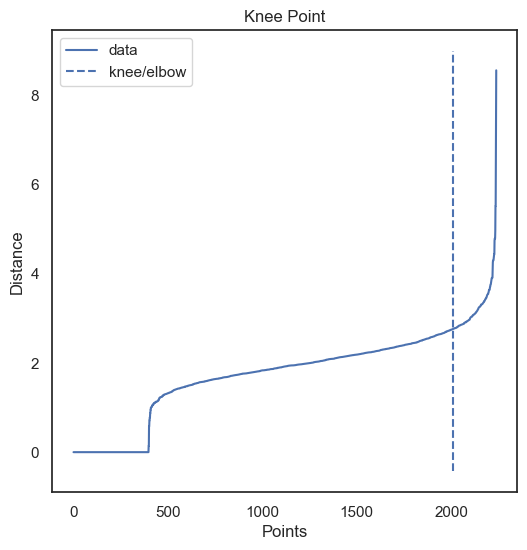

Knee Locator k = 2.7625349260996677


In [100]:

from kneed import KneeLocator

i = np.arange(len(distance))
knee = KneeLocator(i, distance, S=1, curve='convex', direction='increasing', interp_method='polynomial')

fig = plt.figure(figsize=(5, 5))
knee.plot_knee()
plt.xlabel("Points")
plt.ylabel("Distance")
plt.show()
k= distance[knee.knee]
print('Knee Locator k =', k)

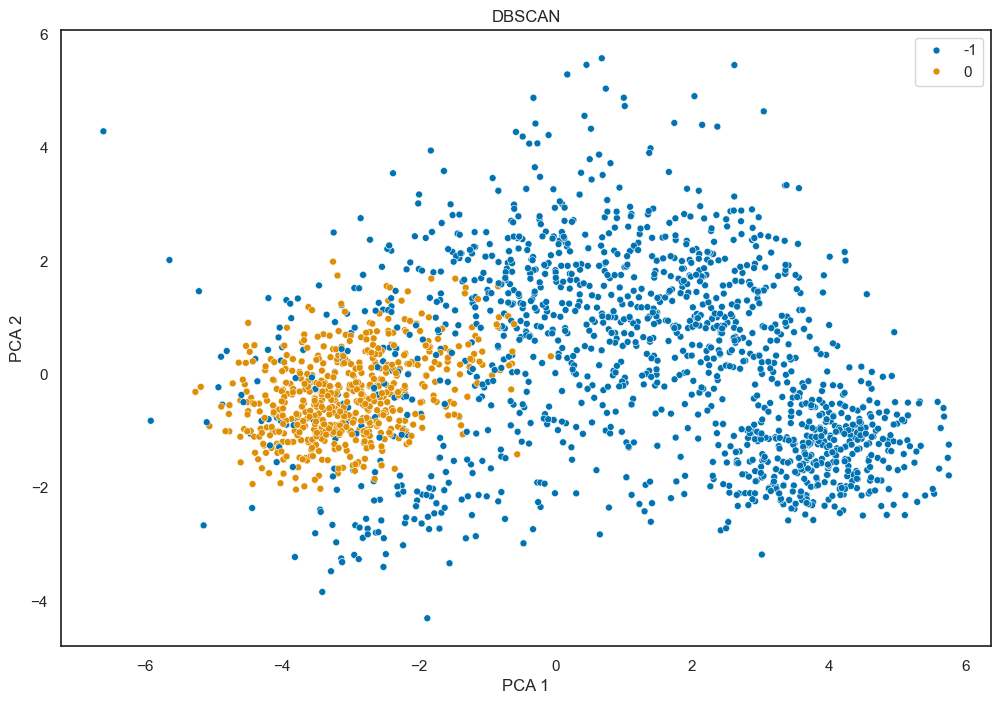

In [103]:
model=DBSCAN(eps=k , min_samples=100).fit(df_scaled)
model_label = model.labels_
plt.figure(figsize=(12,8))

plt.title('DBSCAN')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
scatter = sns.scatterplot(
                        x = reduced[:,0],
                        y = reduced[:,1],
                        hue= model_label,
                        palette=sns.color_palette("colorblind", len(set(model_label))), s=25 )

**Final model**
- Aa kmeans Clustering performed well then any other algorithim


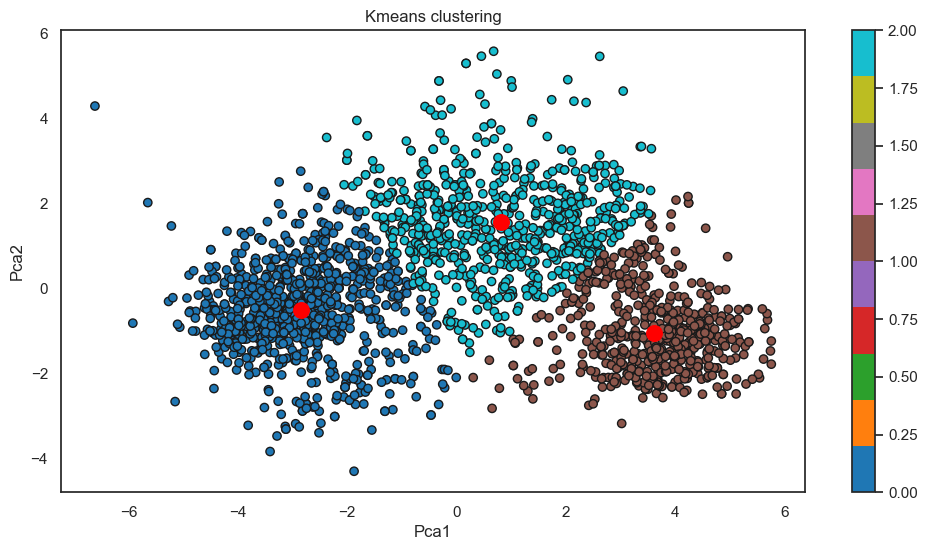

In [114]:
# fitting the model to reduce the data 

model=KMeans(n_clusters=3).fit(reduced)
model_label=model.labels_
model.centers=model.cluster_centers_

plt.figure(figsize=(12,6))
plt.title("Kmeans clustering")
plt.xlabel("Pca1")
plt.ylabel("Pca2")
scatter=plt.scatter(
    x=pcadf.iloc[:,0],
    y=pcadf.iloc[:,1],
    c=model_label,
    edgecolors='k',
    cmap='tab10'
)
plt.colorbar(scatter)
plt.scatter(model_centers[:,0],model_centers[:,1],marker='.',s=500,c='red')


In [115]:
import os
df['cluster'] =model.labels_.astype(int)
os.makedirs('data')
df.to_csv("./data/cluster_data.csv",index=False)